In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import TextBlob

df = pd.read_csv('/content/Dataset .csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
# Rating text ,    Aggregate rating
"""TextBlob is a library to calculate the polarity and subjectivity of each review. Polarity is a measure of how positive or negative a text is,
ranging from -1 (very negative) to 1 (very positive).
Subjectivity is a measure of how factual or opinionated a text is, ranging from 0 (very objective) to 1 (very subjective)."""


df['Polarity'] = df['Rating text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['Rating text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

def preprocess(text):
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    stop_words = stopwords.words('english')
    keywords = [lemma for lemma in lemmas if lemma not in stop_words and lemma.isalpha()]
    return keywords

df['Keywords'] = df['Rating text'].apply(preprocess)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from collections import Counter

positive_keywords = Counter()
negative_keywords = Counter()

for i in range(len(df)):
    if df['Polarity'][i] > 0:
        positive_keywords.update(df['Keywords'][i])
    elif df['Polarity'][i] < 0:
        negative_keywords.update(df['Keywords'][i])

print('Most common positive keywords:')
print(positive_keywords.most_common(10))

print('Most common negative keywords:')
print(negative_keywords.most_common(10))


Most common positive keywords:
[('good', 3179), ('excellent', 301)]
Most common negative keywords:
[('average', 3737), ('poor', 186)]


In [ ]:
df['Length'] = df['Rating text'].apply(len)
print('Average length of reviews:')
print(np.mean(df['Length']))


Average length of reviews:
7.020730813527379


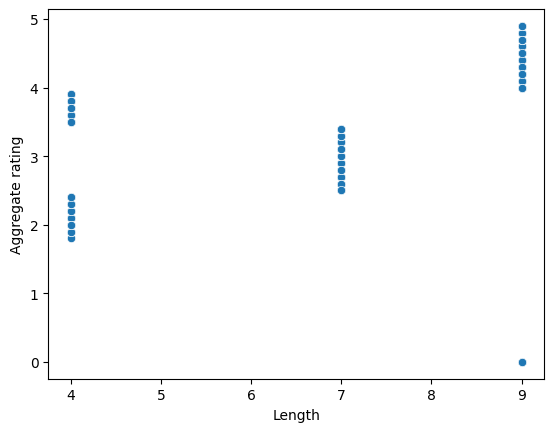

Correlation between length and rating:
-0.4788848381349333


In [ ]:
sns.scatterplot(x='Length', y='Aggregate rating', data=df)
plt.show()

print('Correlation between length and rating:')
print(np.corrcoef(df['Length'], df['Aggregate rating'])[0, 1])


**Based on our results :**

-->Most common positive keywords:
[('good', 3179), ('excellent', 301)]
Most common negative keywords:
[('average', 3737), ('poor', 186)]

-->The correlation between length and rating is **negative**, which means that as the length of the review increases, the rating tends to decrease, and vice versa.


